In [45]:
import pandas as pd
import numpy as np
import pandas_profiling

import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization


pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 500)
pd.set_option('float_format', '{:f}'.format)
pd.options.display.float_format = '{:.4f}'.format




from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve

from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.over_sampling import BorderlineSMOTE


In [ ]:
from IPython.display import Markdown, display

def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

In [117]:
printmd("**bold and blue**", color="blue")


<span style='color:blue'>**bold and blue**</span>

In [119]:
print('dkjvkjfs')
printmd('dkjvkjfs')

dkjvkjfs


<span style='color:None'>dkjvkjfs</span>

In [142]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [22]:
pandas_profiling.ProfileReport(df)

Number of variables,21
Number of observations,7043
Total Missing (%),0.0%
Total size in memory,1.0 MiB
Average record size in memory,152.0 B
Numeric,2
Categorical,13
Boolean,5
Date,0
Text (Unique),1
Rejected,0


##### customerID: Customer ID
##### gender: Whether the customer is a male or a female
##### SeniorCitizen :Whether the customer is a senior citizen or not (1, 0)
##### Partner :Whether the customer has a partner or not (Yes, No)
##### Dependents Whether the customer has dependents or not (Yes, No)
##### tenure: Number of months the customer has stayed with the company
##### PhoneService :Whether the customer has a phone service or not (Yes, No)
##### MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
##### InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
##### OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
##### OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
##### DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
##### TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
##### StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
##### StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
##### Contract:  The contract term of the customer (Month-to-month, One year, Two year)
##### PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
##### PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
##### MonthlyCharges: The amount charged to the customer monthly
##### TotalCharges :The total amount charged to the customer
##### Churn: Whether the customer churned or not (Yes or No)

In [20]:
from IPython.display import display, HTML, display_html
display(df.head())
display(df.sample(5))
display(df.shape)
display(df.dtypes)
display(df.nunique())
display(df.describe())
display(df.describe(include = 'O'))
display(df.isna().sum())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,-1,0,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.850000,29.850000,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,1,0,1,0,0,0,One year,0,Mailed check,56.950000,1889.500000,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.850000,108.150000,1
3,7795-CFOCW,1,0,0,0,45,0,-1,0,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.300000,1840.750000,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.700000,151.650000,1


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4605,3796-ENZGF,1,0,1,0,63,1,1,0,0,1,0,1,0,1,Two year,0,Mailed check,67.250000,4234.150000,0
4156,2465-BLLEU,1,0,0,0,1,1,0,-1,-1,-1,-1,-1,-1,-1,Month-to-month,1,Mailed check,19.750000,19.750000,0
5001,8292-TYSPY,1,0,0,0,19,1,0,0,0,0,1,1,0,0,Month-to-month,1,Credit card (automatic),55.000000,1046.500000,1
4340,4468-YDOVK,1,0,0,1,5,1,0,0,0,0,0,1,0,0,Month-to-month,1,Bank transfer (automatic),48.650000,235.200000,0
3246,8806-EAGWC,1,0,0,0,3,1,0,0,0,0,0,0,1,0,Month-to-month,0,Mailed check,55.150000,159.150000,1


(7032, 21)

customerID           object
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract             object
PaperlessBilling      int32
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.325228,0.224118,0.070392,0.128697,0.127702,0.073948,0.168231,0.172213,0.592719,64.798208,2283.300441,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.642585,0.778643,0.705562,0.737917,0.737415,0.707715,0.756518,0.758252,0.491363,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000


,customerID,Contract,PaymentMethod
count,7032,7032,7032
unique,7032,3,4
top,9026-LHEVG,Month-to-month,Electronic check
freq,1,3875,2365


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

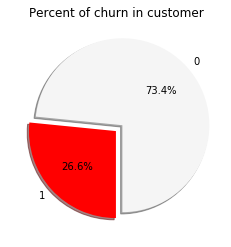

In [179]:
# Data to plot
labels =df['Churn'].value_counts().index
sizes = df['Churn'].value_counts()

plt.pie(sizes, explode=(0.1,0), labels=labels, colors=["whitesmoke","red"], autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of churn in customer')
plt.show()

In [143]:
df['gender'] = df['gender'].map( {'Female': 0, 'Male': 1} ).astype(int)                 #
df['Partner'] = df['Partner'].map( {'No': 0, 'Yes': 1} ).astype(int)                    #
df['Dependents'] = df['Dependents'].map( {'No': 0, 'Yes': 1} ).astype(int)              #
df['PhoneService'] = df['PhoneService'].map( {'No': 0, 'Yes': 1} ).astype(int)          #
df['OnlineSecurity'] = df['OnlineSecurity'].map( {'No': 0, 'Yes': 1, 'No internet service': -1} ).astype(int)  #
df['Churn'] = df['Churn'].map( {'No': 0, 'Yes': 1} ).astype(int)                        #
df['OnlineBackup'] = df['OnlineBackup'].map( {'No': 0, 'Yes': 1, 'No internet service': -1} ).astype(int)   #
df['DeviceProtection'] = df['DeviceProtection'].map( {'No': 0, 'Yes': 1, 'No internet service': -1} ).astype(int)
df['TechSupport'] = df['TechSupport'].map( {'No': 0, 'Yes': 1, 'No internet service': -1} ).astype(int)
df['StreamingTV'] = df['StreamingTV'].map( {'No': 0, 'Yes': 1, 'No internet service': -1} ).astype(int)  #
df['StreamingMovies'] = df['StreamingMovies'].map( {'No': 0, 'Yes': 1, 'No internet service': -1} ).astype(int)
df['PaperlessBilling'] = df['PaperlessBilling'].map( {'No': 0, 'Yes': 1} ).astype(int)   #
df['MultipleLines'] = df['MultipleLines'].map( {'No': 0, 'Yes': 1, 'No phone service': -1} ).astype(int)
df['InternetService'] = df['InternetService'].map( {'DSL': 0, 'Fiber optic': 1, 'No': -1} ).astype(int)


In [144]:
df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [145]:
df.dtypes

customerID           object
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract             object
PaperlessBilling      int32
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int32
dtype: object

In [146]:
# deleting emply values in Total charge column
df = df.drop(df[df.TotalCharges == ' '].index)

In [147]:
df.TotalCharges = df.TotalCharges.astype('float64')

In [148]:
churn= df[df.Churn == 1]
nochurn= df[df.Churn == 0]

In [17]:
def kdeplot(feature):
    plt.figure(figsize=(12, 6))
    sns.kdeplot(churn[feature], color= 'navy', label= 'Churn: Yes')
    sns.kdeplot(nochurn[feature], color= 'orange', label= 'Churn: No')

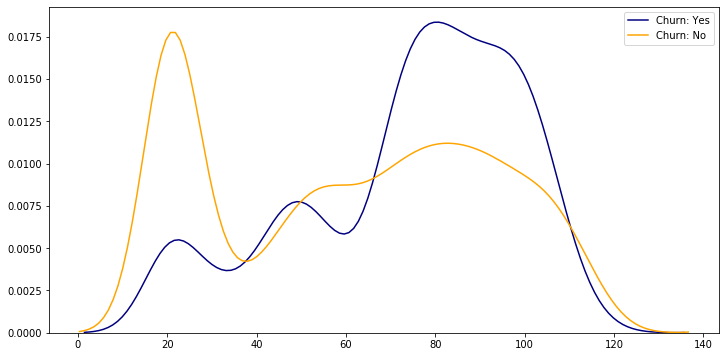

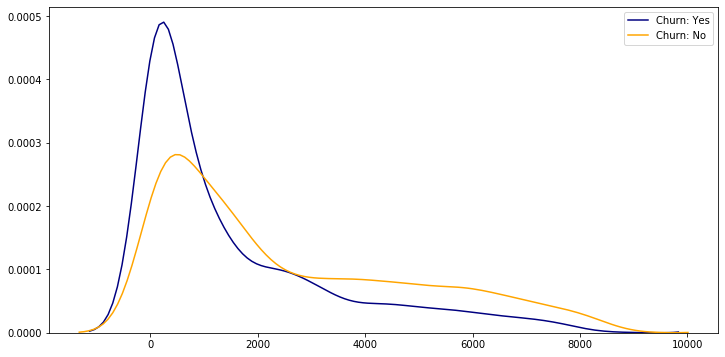

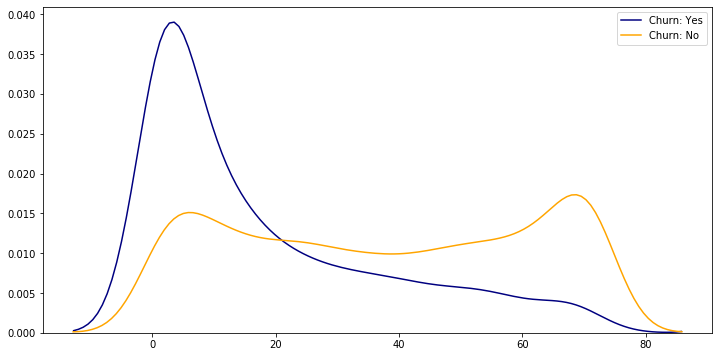

In [19]:
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')
kdeplot('tenure')

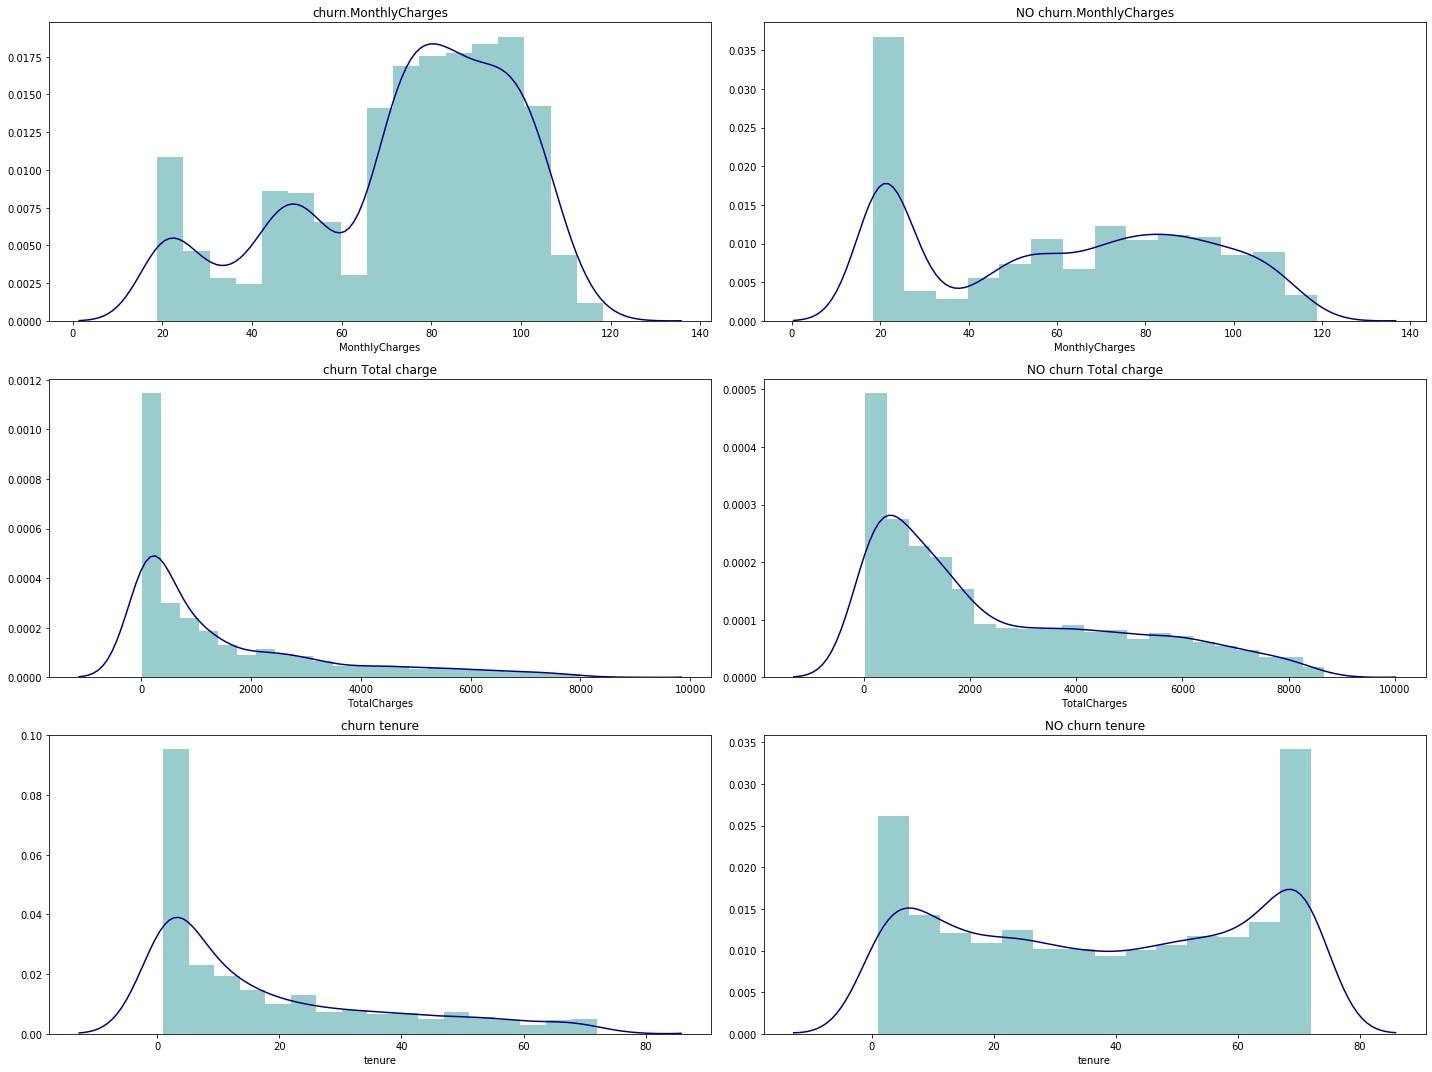

In [10]:
plt.subplots(figsize=(20,15))
plt.subplot(321)
sns.distplot(churn.MonthlyCharges, hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'})
plt.title('churn.MonthlyCharges')

plt.subplot(322)
sns.distplot(nochurn.MonthlyCharges, hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'});
plt.title('NO churn.MonthlyCharges')

plt.subplot(323)
sns.distplot(churn.TotalCharges, hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'})
plt.title('churn Total charge')

plt.subplot(324)
sns.distplot(nochurn.TotalCharges, hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'});
plt.title('NO churn Total charge')

plt.subplot(325)
sns.distplot(churn.tenure, hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'})
plt.title('churn tenure')

plt.subplot(326)
sns.distplot(nochurn.tenure, hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'});
plt.title('NO churn tenure')
plt.tight_layout()

plt.show()

In [11]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,-1,0,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.850000,29.850000,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,1,0,1,0,0,0,One year,0,Mailed check,56.950000,1889.500000,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.850000,108.150000,1
3,7795-CFOCW,1,0,0,0,45,0,-1,0,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.300000,1840.750000,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.700000,151.650000,1


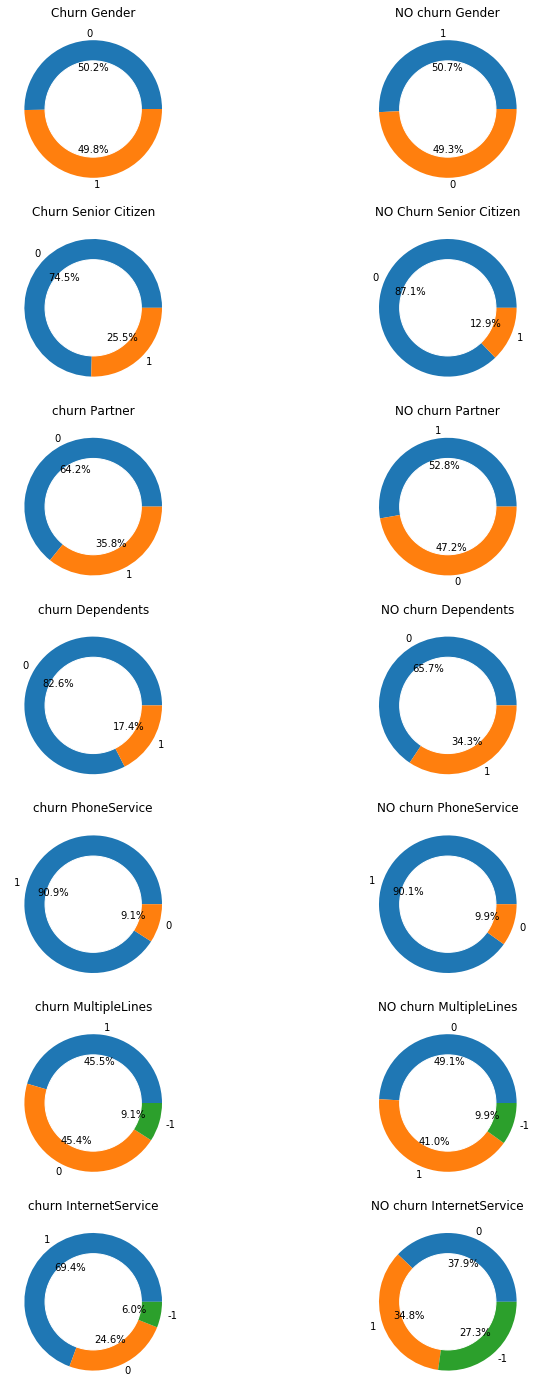

In [12]:
plt.subplots(figsize=(10,25))
plt.subplot(921)
plt.pie(churn.gender.value_counts(), labels=churn.gender.value_counts().index, autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(plt.Circle( (0,0), 0.7, color='white'))
plt.title('Churn Gender')

plt.subplot(922)
plt.pie(nochurn.gender.value_counts(), labels=nochurn.gender.value_counts().index, autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(plt.Circle( (0,0), 0.7, color='white'))
plt.title('NO churn Gender')
#-----------------------------------------------------------------------------------------#
plt.subplot(923)
plt.pie(churn.SeniorCitizen.value_counts(), labels=churn.SeniorCitizen.value_counts().index, autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(plt.Circle( (0,0), 0.7, color='white'))
plt.title('Churn Senior Citizen')

plt.subplot(924)
plt.pie(nochurn.SeniorCitizen.value_counts(), labels=nochurn.SeniorCitizen.value_counts().index, autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(plt.Circle( (0,0), 0.7, color='white'))
plt.title('NO Churn Senior Citizen')

plt.subplot(925)
plt.pie(churn.Partner.value_counts(), labels=churn.Partner.value_counts().index, autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(plt.Circle( (0,0), 0.7, color='white'))
plt.title('churn Partner')

plt.subplot(926)
plt.pie(nochurn.Partner.value_counts(), labels=nochurn.Partner.value_counts().index, autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(plt.Circle( (0,0), 0.7, color='white'))
plt.title('NO churn Partner')
plt.tight_layout()

plt.subplot(927)
plt.pie(churn.Dependents.value_counts(), labels=churn.Dependents.value_counts().index, autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(plt.Circle( (0,0), 0.7, color='white'))
plt.title('churn Dependents')

plt.subplot(928)
plt.pie(nochurn.Dependents.value_counts(), labels=nochurn.Dependents.value_counts().index, autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(plt.Circle( (0,0), 0.7, color='white'))
plt.title('NO churn Dependents')
plt.tight_layout()

plt.subplot(929)
plt.pie(churn.PhoneService.value_counts(), labels=churn.PhoneService.value_counts().index, autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(plt.Circle( (0,0), 0.7, color='white'))
plt.title('churn PhoneService')

plt.subplot(9,2,10)
plt.pie(nochurn.PhoneService.value_counts(), labels=nochurn.PhoneService.value_counts().index, autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(plt.Circle( (0,0), 0.7, color='white'))
plt.title('NO churn PhoneService')
plt.tight_layout()

plt.subplot(9,2,11)
plt.pie(churn.MultipleLines.value_counts(), labels=churn.MultipleLines.value_counts().index, autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(plt.Circle( (0,0), 0.7, color='white'))
plt.title('churn MultipleLines')

plt.subplot(9,2,12)
plt.pie(nochurn.MultipleLines.value_counts(), labels=nochurn.MultipleLines.value_counts().index, autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(plt.Circle( (0,0), 0.7, color='white'))
plt.title('NO churn MultipleLines')
plt.tight_layout()

plt.subplot(9,2,13)
plt.pie(churn.InternetService.value_counts(), labels=churn.InternetService.value_counts().index, autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(plt.Circle( (0,0), 0.7, color='white'))
plt.title('churn InternetService')

plt.subplot(9,2,14)
plt.pie(nochurn.InternetService.value_counts(), labels=nochurn.InternetService.value_counts().index, autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(plt.Circle( (0,0), 0.7, color='white'))
plt.title('NO churn InternetService')
plt.tight_layout()

# plt.subplot(325)
# plt.pie(churn.Dependents.value_counts(), labels=df.Churn.value_counts().index, autopct='%1.1f%%')
# p=plt.gcf()
# p.gca().add_artist(plt.Circle( (0,0), 0.7, color='white'))
# plt.title('churn tenure')

# plt.subplot(326)
# plt.pie(nochurn.Dependents.value_counts(), labels=df.Churn.value_counts().index, autopct='%1.1f%%')
# p=plt.gcf()
# p.gca().add_artist(plt.Circle( (0,0), 0.7, color='white'))
# plt.title('NO churn tenure')
# plt.tight_layout()

# plt.subplot(325)
# plt.pie(churn.Dependents.value_counts(), labels=df.Churn.value_counts().index, autopct='%1.1f%%')
# p=plt.gcf()
# p.gca().add_artist(plt.Circle( (0,0), 0.7, color='white'))
# plt.title('churn tenure')

# plt.subplot(326)
# plt.pie(nochurn.Dependents.value_counts(), labels=df.Churn.value_counts().index, autopct='%1.1f%%')
# p=plt.gcf()
# p.gca().add_artist(plt.Circle( (0,0), 0.7, color='white'))
# plt.title('NO churn tenure')
# plt.tight_layout()


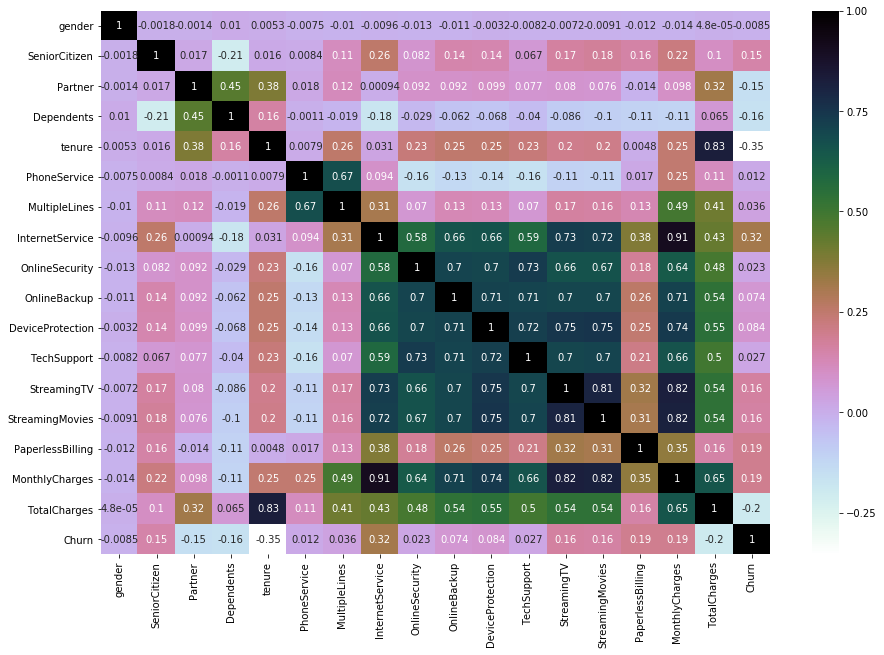

In [13]:
plt.figure(figsize=(15,10)) 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r')

In [168]:
df.groupby('tenure')['Churn'].mean()

tenure
1    0.6199
2    0.5168
3    0.4700
4    0.4716
5    0.4812
6    0.3636
7    0.3893
8    0.3415
9    0.3866
10   0.3879
11   0.3131
12   0.3248
13   0.3486
14   0.3158
15   0.3737
16   0.3500
17   0.2989
18   0.2474
19   0.2603
20   0.2535
21   0.2698
22   0.3000
23   0.1529
24   0.2447
25   0.2911
26   0.1899
27   0.1806
28   0.2105
29   0.2083
30   0.2222
31   0.2462
32   0.2754
33   0.2188
34   0.1846
35   0.1705
36   0.2000
37   0.2308
38   0.2203
39   0.2500
40   0.2031
41   0.2000
42   0.2154
43   0.2308
44   0.1176
45   0.0984
46   0.1622
47   0.2059
48   0.1406
49   0.2273
50   0.1471
51   0.1176
52   0.1000
53   0.2000
54   0.1912
55   0.1406
56   0.1250
57   0.1231
58   0.1642
59   0.1333
60   0.0789
61   0.1053
62   0.0714
63   0.0556
64   0.0500
65   0.1184
66   0.1461
67   0.1020
68   0.0900
69   0.0842
70   0.0924
71   0.0353
72   0.0166
Name: Churn, dtype: float64

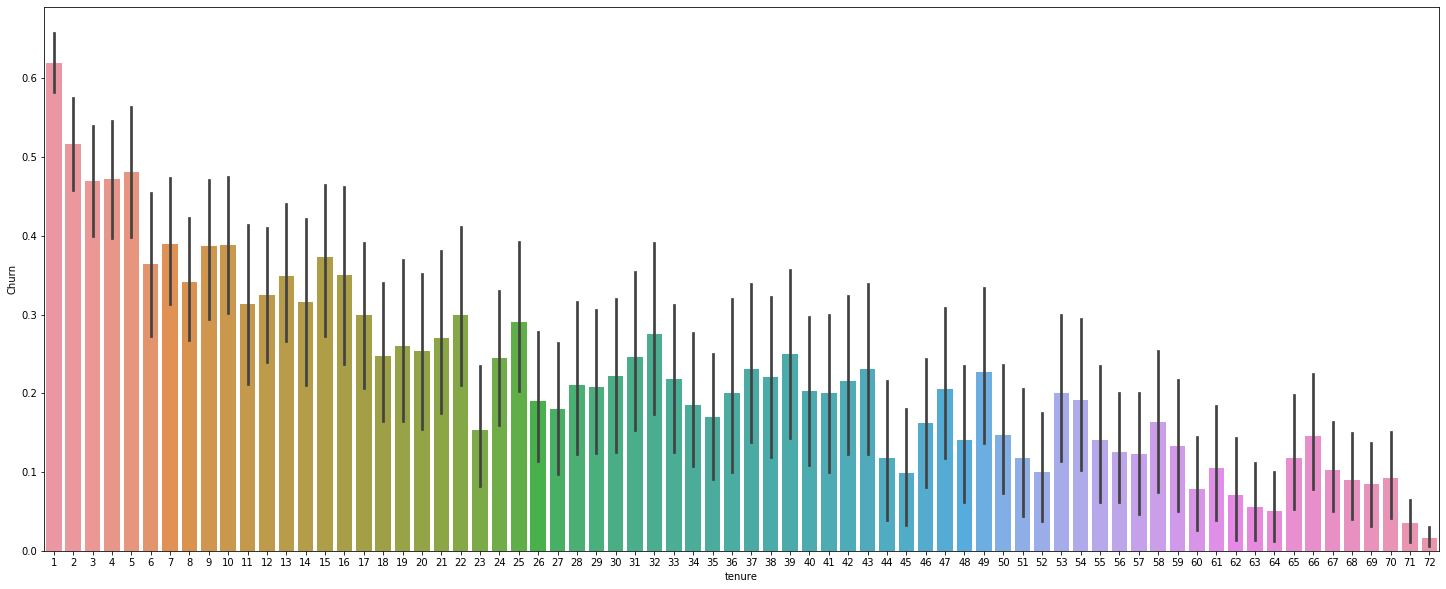

In [173]:
plt.figure(figsize=(25,10))

sns.barplot(df.tenure, df.Churn)

In [174]:
sns.countplot(x="Churn", hue="Contract", data=df)

ValueError: Could not interpret input 'Contract'

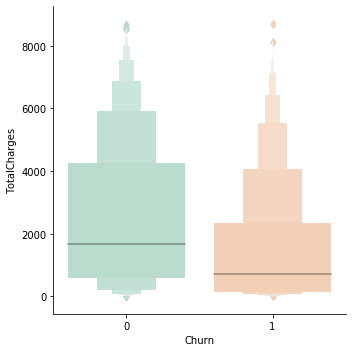

In [180]:
sns.factorplot(y="TotalCharges",x="Churn",data=df,kind="boxen", palette = "Pastel2")

From boxen plot, most of churn customer has less than 2000 in total chrage.
In range of 2500 to 8000, population of loyalty customer is around twice as amount as churn customer.

In [140]:
df.head()

,Electronic check,One year,Two year,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Avg_earning_per_cstmr
0,1,0,0,0,0,0,1,0,-1,0,0,1,0,0,0,0,1,29.8500,29.8500,0,29.8500
1,0,1,0,1,0,0,34,1,0,0,1,0,1,0,0,0,0,56.9500,1889.5000,0,55.5735
2,0,0,0,1,0,0,2,1,0,0,1,1,0,0,0,0,1,53.8500,108.1500,1,54.0750
3,0,1,0,1,0,0,45,0,-1,0,1,0,1,1,0,0,0,42.3000,1840.7500,0,40.9056
4,1,0,0,0,0,0,2,1,0,1,0,0,0,0,0,0,1,70.7000,151.6500,1,75.8250


In [141]:
df[['tenure','MonthlyCharges']]

,tenure,MonthlyCharges
0,1,29.8500
1,34,56.9500
2,2,53.8500
3,45,42.3000
4,2,70.7000
5,8,99.6500
6,22,89.1000
7,10,29.7500
8,28,104.8000
9,62,56.1500


In [149]:
# Feature engineering
df['Avg_earning_per_cstmr'] = df.TotalCharges/df.tenure

In [150]:
df.drop('customerID', axis=1, inplace=True)

In [151]:
df=pd.concat([pd.get_dummies(df['Contract'], drop_first = True),df],axis=1).drop('Contract',axis=1)
df=pd.concat([pd.get_dummies(df['PaymentMethod'], drop_first = True),df],axis=1).drop('PaymentMethod',axis=1)

In [132]:
# df.drop(['Partner','Credit card (automatic)','Mailed check'], axis=1, inplace=True)

In [152]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron

X = df.drop(['Churn'], axis=1)
Y = df.Churn

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=32, stratify= Y)

feature_cols = X.columns

In [153]:
# LR RFE feature selector ranking
lrselector = RFE(LogisticRegression(),1,step=1) .fit(X, Y)
lr_rfe = pd.DataFrame({"columns" :  X.columns, "LR_rank" : lrselector.ranking_})
# lr_rfe.sort_values('LR rank')

# Random Forest
rfselector = RFE(RandomForestClassifier(),1,step=1).fit(X, Y)
rf_rfe = pd.DataFrame({"columns" :  X.columns, "RF_Rank" : rfselector.ranking_})

# XGB
xgbselector = RFE(XGBClassifier(),1,step=1).fit(X, Y)
xgb_rfe = pd.DataFrame({"columns" :  X.columns, "XGB_Rank" : xgbselector.ranking_})

#LDA
ldaselector = RFE(LinearDiscriminantAnalysis(),1,step=1).fit(X, Y)
lda_rfe = pd.DataFrame({"columns" :  X.columns, "LDA_Rank" : ldaselector.ranking_})

# Decesion Tree
dtselector = RFE(DecisionTreeClassifier(),1,step=1).fit(X, Y)
dt_rfe = pd.DataFrame({"columns" :  X.columns, "DT_Rank" : dtselector.ranking_})

# Adaboost
adaselector = RFE(AdaBoostClassifier(),1,step=1).fit(X, Y)
ada_rfe = pd.DataFrame({"columns" :  X.columns, "ADA_Rank" : adaselector.ranking_})

#Passive Aggressive Classifier
pacselector = RFE(PassiveAggressiveClassifier(),1,step=1).fit(X, Y)
pac_rfe = pd.DataFrame({"columns" :  X.columns, "PAC_Rank" : pacselector.ranking_})

#SVC
svcselector = RFE(LinearSVC(),1,step=1).fit(X, Y)
svc_rfe = pd.DataFrame({"columns" :  X.columns, "SVC_Rank" : svcselector.ranking_})

# Perceptron
perselector = RFE(Perceptron(),1,step=1).fit(X, Y)
per_rfe = pd.DataFrame({"columns" :  X.columns, "Perceptron_Rank" : perselector.ranking_})

aoo=pd.merge(lda_rfe, ada_rfe, on='columns')
boo=pd.merge(aoo, dt_rfe, on='columns')
coo=pd.merge(boo, xgb_rfe, on='columns')
doo=pd.merge(coo, rf_rfe, on='columns')
eoo=pd.merge(doo, lr_rfe, on='columns')
foo=pd.merge(eoo, pac_rfe, on='columns')
goo=pd.merge(foo, per_rfe, on='columns')

goo['mean'] = goo.mean(axis=1)

goo.sort_values('mean')

,columns,LDA_Rank,ADA_Rank,DT_Rank,XGB_Rank,RF_Rank,LR_rank,PAC_Rank,Perceptron_Rank,mean
12,InternetService,4,8,5,3,5,3,5,7,5.0000
4,Two year,1,6,20,1,12,1,1,1,5.3750
13,OnlineSecurity,5,10,8,6,9,5,10,5,7.2500
3,One year,2,14,18,2,17,2,2,2,7.3750
1,Electronic check,3,16,9,4,6,4,9,12,7.8750
16,TechSupport,9,12,15,9,7,11,13,4,10.0000
9,tenure,18,3,4,5,4,16,17,14,10.1250
11,MultipleLines,16,5,13,11,14,15,7,9,11.2500
19,PaperlessBilling,8,9,10,7,10,7,16,23,11.2500
14,OnlineBackup,7,15,12,21,8,8,4,15,11.2500


Accuracy Test  : 0.8090; || Accuracy Train : 0.8728
Precision Test : 0.6863; || Precision Train: 0.8193
Recall Test    : 0.5187; || Recall Train   : 0.6690
Cohen Kappa    : 0.4694; || Avg Precesion  : 0.6360; || AUC:0.7164


<span style='color:blue'>**CONFUSION MATRIX**</span>

col_0     0    1   All
Churn                 
0      1416  133  1549
1       270  291   561
All    1686  424  2110


<span style='color:red'>**Classification Report**</span>

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1549
           1       0.69      0.52      0.59       561

    accuracy                           0.81      2110
   macro avg       0.76      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



<span style='color:green'>** Feature Importances**</span>

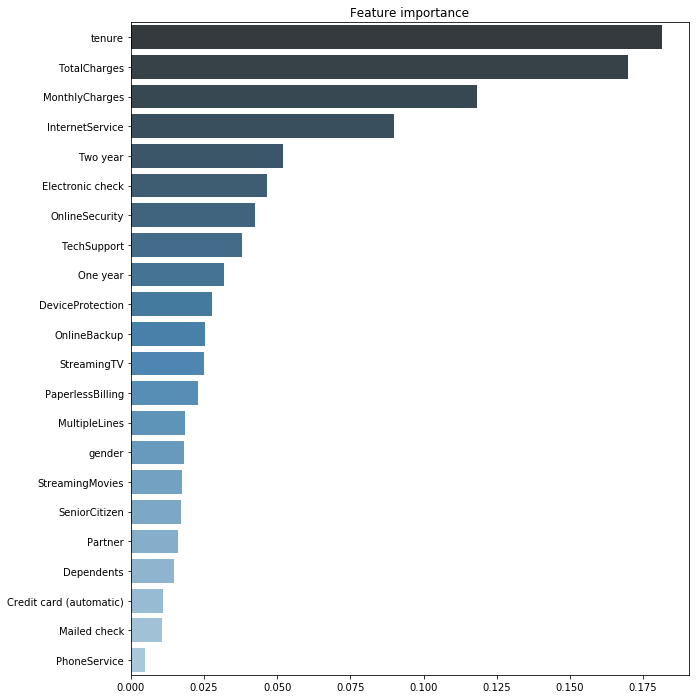

In [120]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, random_state=22, max_depth= 10, class_weight={0:1,1:1})
classifier.fit(X_train, y_train)
x_predrf = classifier.predict(X_train)
y_predrf = classifier.predict(X_test)

print(f'Accuracy Test  : {accuracy_score(y_test, y_predrf):0.4f}; || Accuracy Train : {accuracy_score(y_train, x_predrf):0.4f}')
print(f'Precision Test : {precision_score(y_test, y_predrf):0.4f}; || Precision Train: {precision_score(y_train, x_predrf):0.4f}')
print(f'Recall Test    : {recall_score(y_test, y_predrf):0.4f}; || Recall Train   : {recall_score(y_train, x_predrf):0.4f}')
print(f'Cohen Kappa    : {cohen_kappa_score(y_test, y_predrf):0.4f}; || Avg Precesion  : {average_precision_score(y_train, x_predrf):0.4f}; || AUC:{roc_auc_score(y_test,y_predrf):0.4f}')
printmd("**CONFUSION MATRIX**", color="blue")
print(pd.crosstab(y_test, y_predrf, margins = True))
printmd("**Classification Report**", color="red")
print(classification_report(y_test,y_predrf ))
printmd("** Feature Importances**", color="green")

importances = classifier.feature_importances_
weights = pd.Series(importances, index=X.columns.values).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=weights.index, x=weights.values, palette="Blues_d", orient='h')

In [184]:
%%time
from sklearn.model_selection import  cross_val_score,GridSearchCV

param_grid  = { 
                'n_estimators' : [200,500,1200],
               'min_samples_split': [2,5,10,15,100],
               'min_samples_leaf': [1,2,5,10],
                'max_depth': (1,3,5,8,11),
                'max_features' : ('log2', 'sqrt'),
                'class_weight':[{1: w} for w in [1,10]]
              }

GridRF = GridSearchCV(RandomForestClassifier(random_state=15), param_grid)

GridRF.fit(X_train, y_train)
#RF_preds = GridRF.predict_proba(X_test)[:, 1]
#RF_performance = roc_auc_score(Y_test, RF_preds)

print(
    #'DecisionTree: Area under the ROC curve = {}'.format(RF_performance)
     "\nBest parameters \n" + str(GridRF.best_params_))

KeyboardInterrupt: 

In [159]:
%%time
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score, precision_score, recall_score

LR = LogisticRegression('l2')
LR.fit(X_train, y_train)

x_predrf = LR.predict(X_train)
y_predrf = LR.predict(X_test)

print(f'Accuracy Test  : {accuracy_score(y_test, y_predrf):0.4f}; || Accuracy Train : {accuracy_score(y_train, x_predrf):0.4f}')
print(f'Precision Test : {precision_score(y_test, y_predrf):0.4f}; || Precision Train: {precision_score(y_train, x_predrf):0.4f}')
print(f'Recall Test    : {recall_score(y_test, y_predrf):0.4f}; || Recall Train   : {recall_score(y_train, x_predrf):0.4f}')
print(f'Cohen Kappa    : {cohen_kappa_score(y_test, y_predrf):0.4f}; || Avg Precesion  : {average_precision_score(y_train, x_predrf):0.4f}; || AUC:{roc_auc_score(y_test,y_predrf):0.4f}')
printmd("**CONFUSION MATRIX**", color="blue")
print(pd.crosstab(y_test, y_predrf, margins = True))
printmd("**Classification Report**", color="red")

print(classification_report(y_test,y_predrf ))

Accuracy Test  : 0.8081; || Accuracy Train : 0.8052
Precision Test : 0.6688; || Precision Train: 0.6638
Recall Test    : 0.5508; || Recall Train   : 0.5405
Cohen Kappa    : 0.4790; || Avg Precesion  : 0.4809; || AUC:0.7260


<span style='color:blue'>**CONFUSION MATRIX**</span>

col_0     0    1   All
Churn                 
0      1396  153  1549
1       252  309   561
All    1648  462  2110


<span style='color:red'>**Classification Report**</span>

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.67      0.55      0.60       561

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110

Wall time: 791 ms


In [160]:
%%time

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

x_predrf = xgb.predict(X_train)
y_predrf = xgb.predict(X_test)

print(f'Accuracy Test  : {accuracy_score(y_test, y_predrf):0.4f}; || Accuracy Train : {accuracy_score(y_train, x_predrf):0.4f}')
print(f'Precision Test : {precision_score(y_test, y_predrf):0.4f}; || Precision Train: {precision_score(y_train, x_predrf):0.4f}')
print(f'Recall Test    : {recall_score(y_test, y_predrf):0.4f}; || Recall Train   : {recall_score(y_train, x_predrf):0.4f}')
print(f'Cohen Kappa    : {cohen_kappa_score(y_test, y_predrf):0.4f}; || Avg Precesion  : {average_precision_score(y_train, x_predrf):0.4f}; || AUC:{roc_auc_score(y_test,y_predrf):0.4f}')
printmd("**CONFUSION MATRIX**", color="blue")
print(pd.crosstab(y_test, y_predrf, margins = True))
printmd("**Classification Report**", color="red")

print(classification_report(y_test,y_predrf ))

Accuracy Test  : 0.8066; || Accuracy Train : 0.8220
Precision Test : 0.6727; || Precision Train: 0.7122
Recall Test    : 0.5312; || Recall Train   : 0.5543
Cohen Kappa    : 0.4690; || Avg Precesion  : 0.5132; || AUC:0.7188


<span style='color:blue'>**CONFUSION MATRIX**</span>

col_0     0    1   All
Churn                 
0      1404  145  1549
1       263  298   561
All    1667  443  2110


<span style='color:red'>**Classification Report**</span>

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1549
           1       0.67      0.53      0.59       561

    accuracy                           0.81      2110
   macro avg       0.76      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110

Wall time: 3.97 s


In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import ExtraTreeClassifier
from catboost import CatBoostClassifier


In [47]:
classifiers = [['DecisionTree :',DecisionTreeClassifier(max_depth= 8)],
               ['LDA :',LinearDiscriminantAnalysis()], 
               ['Naive Bayes :', GaussianNB()],
               ['KNeighbours :', KNeighborsClassifier()],
               ['SVM :', SVC()],
               ['Neural Network :', MLPClassifier()],
               ['LogisticRegression :', LogisticRegression()],
               ['ExtraTreesClassifier :', ExtraTreeClassifier()],
               ['AdaBoostClassifier :', AdaBoostClassifier()],
               ['GradientBoostingClassifier : ', GradientBoostingClassifier()],
               ['XGB :', XGBClassifier()],
               ['Random Forest : ', RandomForestClassifier(max_depth= 10)],
               ['CatBoost :', CatBoostClassifier()]]

predictions_df = pd.DataFrame()
predictions_df['actual_labels'] = y_test

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    predictions_df[name.strip(" :")] = predictions
    print(name, accuracy_score(y_test, predictions))

DecisionTree : 0.7872037914691943
LDA : 0.7995260663507109
Naive Bayes : 0.7350710900473933
KNeighbours : 0.7601895734597156
SVM : 0.7725118483412322
Neural Network : 0.504739336492891
LogisticRegression : 0.8123222748815165
ExtraTreesClassifier : 0.7265402843601896
AdaBoostClassifier : 0.8113744075829384
GradientBoostingClassifier:  0.8113744075829384
XGB : 0.8127962085308057
Random Forest:  0.8004739336492891
Learning rate set to 0.026303
0:	learn: 0.6745876	total: 132ms	remaining: 2m 11s
1:	learn: 0.6601207	total: 316ms	remaining: 2m 37s
2:	learn: 0.6436034	total: 511ms	remaining: 2m 49s
3:	learn: 0.6299151	total: 696ms	remaining: 2m 53s
4:	learn: 0.6148357	total: 881ms	remaining: 2m 55s
5:	learn: 0.6037618	total: 1.03s	remaining: 2m 51s
6:	learn: 0.5926141	total: 1.24s	remaining: 2m 56s
7:	learn: 0.5828083	total: 1.41s	remaining: 2m 54s
8:	learn: 0.5727890	total: 1.59s	remaining: 2m 55s
9:	learn: 0.5627317	total: 1.75s	remaining: 2m 53s
10:	learn: 0.5543032	total: 1.97s	remaining: 

149:	learn: 0.4021201	total: 13.4s	remaining: 1m 15s
150:	learn: 0.4020078	total: 13.4s	remaining: 1m 15s
151:	learn: 0.4019044	total: 13.5s	remaining: 1m 15s
152:	learn: 0.4017289	total: 13.5s	remaining: 1m 14s
153:	learn: 0.4014319	total: 13.6s	remaining: 1m 14s
154:	learn: 0.4013555	total: 13.6s	remaining: 1m 14s
155:	learn: 0.4013446	total: 13.7s	remaining: 1m 13s
156:	learn: 0.4012933	total: 13.7s	remaining: 1m 13s
157:	learn: 0.4011015	total: 13.8s	remaining: 1m 13s
158:	learn: 0.4009521	total: 13.8s	remaining: 1m 13s
159:	learn: 0.4008342	total: 13.9s	remaining: 1m 12s
160:	learn: 0.4008095	total: 13.9s	remaining: 1m 12s
161:	learn: 0.4007632	total: 13.9s	remaining: 1m 12s
162:	learn: 0.4007508	total: 14s	remaining: 1m 11s
163:	learn: 0.4007257	total: 14s	remaining: 1m 11s
164:	learn: 0.4006914	total: 14s	remaining: 1m 11s
165:	learn: 0.4006321	total: 14.1s	remaining: 1m 10s
166:	learn: 0.4006236	total: 14.1s	remaining: 1m 10s
167:	learn: 0.4006077	total: 14.2s	remaining: 1m 10s

311:	learn: 0.3918568	total: 20.4s	remaining: 44.9s
312:	learn: 0.3918328	total: 20.4s	remaining: 44.8s
313:	learn: 0.3918009	total: 20.5s	remaining: 44.7s
314:	learn: 0.3917971	total: 20.5s	remaining: 44.6s
315:	learn: 0.3917658	total: 20.6s	remaining: 44.5s
316:	learn: 0.3917174	total: 20.6s	remaining: 44.4s
317:	learn: 0.3917170	total: 20.6s	remaining: 44.3s
318:	learn: 0.3917165	total: 20.7s	remaining: 44.1s
319:	learn: 0.3917154	total: 20.7s	remaining: 44s
320:	learn: 0.3917019	total: 20.7s	remaining: 43.9s
321:	learn: 0.3916039	total: 20.8s	remaining: 43.8s
322:	learn: 0.3915749	total: 20.8s	remaining: 43.6s
323:	learn: 0.3915632	total: 20.9s	remaining: 43.5s
324:	learn: 0.3915627	total: 20.9s	remaining: 43.4s
325:	learn: 0.3915571	total: 20.9s	remaining: 43.2s
326:	learn: 0.3915417	total: 21s	remaining: 43.1s
327:	learn: 0.3915325	total: 21s	remaining: 43s
328:	learn: 0.3915314	total: 21s	remaining: 42.9s
329:	learn: 0.3915144	total: 21.1s	remaining: 42.8s
330:	learn: 0.3915120	

471:	learn: 0.3857508	total: 27.9s	remaining: 31.3s
472:	learn: 0.3857481	total: 28s	remaining: 31.2s
473:	learn: 0.3855966	total: 28s	remaining: 31.1s
474:	learn: 0.3855463	total: 28.1s	remaining: 31.1s
475:	learn: 0.3854635	total: 28.2s	remaining: 31s
476:	learn: 0.3854544	total: 28.2s	remaining: 30.9s
477:	learn: 0.3854535	total: 28.2s	remaining: 30.8s
478:	learn: 0.3854174	total: 28.3s	remaining: 30.8s
479:	learn: 0.3854169	total: 28.3s	remaining: 30.7s
480:	learn: 0.3853907	total: 28.4s	remaining: 30.6s
481:	learn: 0.3853873	total: 28.4s	remaining: 30.5s
482:	learn: 0.3853852	total: 28.5s	remaining: 30.5s
483:	learn: 0.3852558	total: 28.5s	remaining: 30.4s
484:	learn: 0.3852135	total: 28.6s	remaining: 30.3s
485:	learn: 0.3851882	total: 28.6s	remaining: 30.3s
486:	learn: 0.3851878	total: 28.7s	remaining: 30.2s
487:	learn: 0.3851123	total: 28.7s	remaining: 30.1s
488:	learn: 0.3850018	total: 28.8s	remaining: 30.1s
489:	learn: 0.3849233	total: 28.8s	remaining: 30s
490:	learn: 0.384882

633:	learn: 0.3806872	total: 35.7s	remaining: 20.6s
634:	learn: 0.3806752	total: 35.7s	remaining: 20.5s
635:	learn: 0.3806476	total: 35.8s	remaining: 20.5s
636:	learn: 0.3806476	total: 35.8s	remaining: 20.4s
637:	learn: 0.3806110	total: 35.9s	remaining: 20.4s
638:	learn: 0.3806109	total: 35.9s	remaining: 20.3s
639:	learn: 0.3805764	total: 36s	remaining: 20.2s
640:	learn: 0.3804929	total: 36s	remaining: 20.2s
641:	learn: 0.3804229	total: 36.1s	remaining: 20.1s
642:	learn: 0.3804148	total: 36.1s	remaining: 20s
643:	learn: 0.3804031	total: 36.2s	remaining: 20s
644:	learn: 0.3802973	total: 36.2s	remaining: 19.9s
645:	learn: 0.3802701	total: 36.3s	remaining: 19.9s
646:	learn: 0.3802429	total: 36.3s	remaining: 19.8s
647:	learn: 0.3802268	total: 36.4s	remaining: 19.7s
648:	learn: 0.3802247	total: 36.4s	remaining: 19.7s
649:	learn: 0.3801836	total: 36.5s	remaining: 19.6s
650:	learn: 0.3801835	total: 36.5s	remaining: 19.6s
651:	learn: 0.3801807	total: 36.5s	remaining: 19.5s
652:	learn: 0.380120

792:	learn: 0.3765885	total: 43.6s	remaining: 11.4s
793:	learn: 0.3765608	total: 43.7s	remaining: 11.3s
794:	learn: 0.3765003	total: 43.7s	remaining: 11.3s
795:	learn: 0.3764978	total: 43.8s	remaining: 11.2s
796:	learn: 0.3764971	total: 43.8s	remaining: 11.2s
797:	learn: 0.3764970	total: 43.9s	remaining: 11.1s
798:	learn: 0.3764938	total: 43.9s	remaining: 11.1s
799:	learn: 0.3764405	total: 44s	remaining: 11s
800:	learn: 0.3763852	total: 44s	remaining: 10.9s
801:	learn: 0.3763707	total: 44.1s	remaining: 10.9s
802:	learn: 0.3763706	total: 44.1s	remaining: 10.8s
803:	learn: 0.3763535	total: 44.2s	remaining: 10.8s
804:	learn: 0.3763535	total: 44.2s	remaining: 10.7s
805:	learn: 0.3763002	total: 44.3s	remaining: 10.7s
806:	learn: 0.3761969	total: 44.3s	remaining: 10.6s
807:	learn: 0.3761894	total: 44.4s	remaining: 10.5s
808:	learn: 0.3761578	total: 44.4s	remaining: 10.5s
809:	learn: 0.3761175	total: 44.5s	remaining: 10.4s
810:	learn: 0.3761137	total: 44.5s	remaining: 10.4s
811:	learn: 0.3760

954:	learn: 0.3725777	total: 51.5s	remaining: 2.43s
955:	learn: 0.3725389	total: 51.6s	remaining: 2.37s
956:	learn: 0.3725106	total: 51.6s	remaining: 2.32s
957:	learn: 0.3724875	total: 51.7s	remaining: 2.27s
958:	learn: 0.3724829	total: 51.8s	remaining: 2.21s
959:	learn: 0.3724828	total: 51.8s	remaining: 2.16s
960:	learn: 0.3724509	total: 51.8s	remaining: 2.1s
961:	learn: 0.3724388	total: 51.9s	remaining: 2.05s
962:	learn: 0.3724251	total: 51.9s	remaining: 2s
963:	learn: 0.3724031	total: 52s	remaining: 1.94s
964:	learn: 0.3723947	total: 52s	remaining: 1.89s
965:	learn: 0.3723413	total: 52.1s	remaining: 1.83s
966:	learn: 0.3723232	total: 52.1s	remaining: 1.78s
967:	learn: 0.3723002	total: 52.2s	remaining: 1.73s
968:	learn: 0.3722739	total: 52.2s	remaining: 1.67s
969:	learn: 0.3722334	total: 52.3s	remaining: 1.62s
970:	learn: 0.3722253	total: 52.4s	remaining: 1.56s
971:	learn: 0.3722241	total: 52.4s	remaining: 1.51s
972:	learn: 0.3722155	total: 52.5s	remaining: 1.46s
973:	learn: 0.372189

In [121]:
predictions_df = pd.DataFrame()
# predictions_df['actual_labels'] = y_test
#         data = data.append(pd.DataFrame({'A': i, 'B': i + 1}, index=[0]), ignore_index=True)

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    
    acc = accuracy_score(y_test, predictions)
    predictions_df = predictions_df.append(pd.DataFrame({'Accuracy': acc},index=[name.strip(" :")]))
    
    prec = precision_score(y_test, predictions)
    predictions_df = predictions_df.append(pd.DataFrame({'Precision': prec},index=[name.strip(" :")]))
    
    reca = recall_score(y_test, predictions)
    predictions_df = predictions_df.append(pd.DataFrame({'Recall': reca},index=[name.strip(" :")]))
    
    aps = average_precision_score(y_test, predictions)
    predictions_df = predictions_df.append(pd.DataFrame({'Avg Precision': aps},index=[name.strip(" :")]))
    
    kappa = cohen_kappa_score(y_test, predictions)
    predictions_df = predictions_df.append(pd.DataFrame({'Kappa': kappa},index=[0]), ignore_index=True)
    
    roc = roc_auc_score(y_test,predictions)
    predictions_df = predictions_df.append(pd.DataFrame({'ROC': roc},index=[0]), ignore_index=True)


Learning rate set to 0.026303
0:	learn: 0.6745876	total: 267ms	remaining: 4m 26s
1:	learn: 0.6601207	total: 560ms	remaining: 4m 39s
2:	learn: 0.6436034	total: 837ms	remaining: 4m 38s
3:	learn: 0.6299151	total: 1.06s	remaining: 4m 23s
4:	learn: 0.6148357	total: 1.3s	remaining: 4m 18s
5:	learn: 0.6037618	total: 1.52s	remaining: 4m 11s
6:	learn: 0.5926141	total: 1.71s	remaining: 4m 2s
7:	learn: 0.5828083	total: 1.91s	remaining: 3m 57s
8:	learn: 0.5727890	total: 2.08s	remaining: 3m 49s
9:	learn: 0.5627317	total: 2.3s	remaining: 3m 47s
10:	learn: 0.5543032	total: 2.47s	remaining: 3m 42s
11:	learn: 0.5476148	total: 2.62s	remaining: 3m 35s
12:	learn: 0.5412313	total: 2.72s	remaining: 3m 26s
13:	learn: 0.5351181	total: 2.82s	remaining: 3m 18s
14:	learn: 0.5277206	total: 2.95s	remaining: 3m 13s
15:	learn: 0.5218945	total: 3.08s	remaining: 3m 9s
16:	learn: 0.5157243	total: 3.21s	remaining: 3m 5s
17:	learn: 0.5103268	total: 3.33s	remaining: 3m 1s
18:	learn: 0.5047864	total: 3.47s	remaining: 2m 59

159:	learn: 0.4008342	total: 12s	remaining: 1m 3s
160:	learn: 0.4008095	total: 12.1s	remaining: 1m 2s
161:	learn: 0.4007632	total: 12.1s	remaining: 1m 2s
162:	learn: 0.4007508	total: 12.2s	remaining: 1m 2s
163:	learn: 0.4007257	total: 12.2s	remaining: 1m 2s
164:	learn: 0.4006914	total: 12.3s	remaining: 1m 2s
165:	learn: 0.4006321	total: 12.3s	remaining: 1m 1s
166:	learn: 0.4006236	total: 12.4s	remaining: 1m 1s
167:	learn: 0.4006077	total: 12.4s	remaining: 1m 1s
168:	learn: 0.4005340	total: 12.4s	remaining: 1m 1s
169:	learn: 0.4004539	total: 12.5s	remaining: 1m 1s
170:	learn: 0.4003526	total: 12.6s	remaining: 1m
171:	learn: 0.4002579	total: 12.6s	remaining: 1m
172:	learn: 0.4001834	total: 12.6s	remaining: 1m
173:	learn: 0.4000002	total: 12.7s	remaining: 1m
174:	learn: 0.3998293	total: 12.8s	remaining: 1m
175:	learn: 0.3996825	total: 12.8s	remaining: 1m
176:	learn: 0.3996766	total: 12.9s	remaining: 59.8s
177:	learn: 0.3995160	total: 12.9s	remaining: 59.7s
178:	learn: 0.3994894	total: 13s

324:	learn: 0.3915627	total: 20.6s	remaining: 42.8s
325:	learn: 0.3915571	total: 20.6s	remaining: 42.6s
326:	learn: 0.3915417	total: 20.7s	remaining: 42.5s
327:	learn: 0.3915325	total: 20.7s	remaining: 42.4s
328:	learn: 0.3915314	total: 20.7s	remaining: 42.3s
329:	learn: 0.3915144	total: 20.8s	remaining: 42.2s
330:	learn: 0.3915120	total: 20.8s	remaining: 42.1s
331:	learn: 0.3914134	total: 20.9s	remaining: 42s
332:	learn: 0.3912299	total: 20.9s	remaining: 41.9s
333:	learn: 0.3911266	total: 21s	remaining: 41.9s
334:	learn: 0.3910986	total: 21s	remaining: 41.8s
335:	learn: 0.3910625	total: 21.1s	remaining: 41.7s
336:	learn: 0.3909718	total: 21.2s	remaining: 41.6s
337:	learn: 0.3909661	total: 21.2s	remaining: 41.6s
338:	learn: 0.3909638	total: 21.3s	remaining: 41.5s
339:	learn: 0.3909581	total: 21.3s	remaining: 41.4s
340:	learn: 0.3909320	total: 21.4s	remaining: 41.3s
341:	learn: 0.3908763	total: 21.4s	remaining: 41.3s
342:	learn: 0.3908550	total: 21.5s	remaining: 41.2s
343:	learn: 0.3908

483:	learn: 0.3852558	total: 29s	remaining: 30.9s
484:	learn: 0.3852135	total: 29.1s	remaining: 30.9s
485:	learn: 0.3851882	total: 29.1s	remaining: 30.8s
486:	learn: 0.3851878	total: 29.2s	remaining: 30.7s
487:	learn: 0.3851123	total: 29.2s	remaining: 30.7s
488:	learn: 0.3850018	total: 29.3s	remaining: 30.6s
489:	learn: 0.3849233	total: 29.3s	remaining: 30.5s
490:	learn: 0.3848821	total: 29.4s	remaining: 30.5s
491:	learn: 0.3848557	total: 29.4s	remaining: 30.4s
492:	learn: 0.3848449	total: 29.5s	remaining: 30.3s
493:	learn: 0.3848213	total: 29.5s	remaining: 30.2s
494:	learn: 0.3847091	total: 29.6s	remaining: 30.2s
495:	learn: 0.3847062	total: 29.6s	remaining: 30.1s
496:	learn: 0.3845945	total: 29.7s	remaining: 30s
497:	learn: 0.3845928	total: 29.7s	remaining: 29.9s
498:	learn: 0.3845649	total: 29.8s	remaining: 29.9s
499:	learn: 0.3845066	total: 29.8s	remaining: 29.8s
500:	learn: 0.3844592	total: 29.9s	remaining: 29.7s
501:	learn: 0.3844588	total: 29.9s	remaining: 29.7s
502:	learn: 0.38

643:	learn: 0.3804031	total: 37.5s	remaining: 20.7s
644:	learn: 0.3802973	total: 37.5s	remaining: 20.7s
645:	learn: 0.3802701	total: 37.6s	remaining: 20.6s
646:	learn: 0.3802429	total: 37.6s	remaining: 20.5s
647:	learn: 0.3802268	total: 37.7s	remaining: 20.5s
648:	learn: 0.3802247	total: 37.7s	remaining: 20.4s
649:	learn: 0.3801836	total: 37.8s	remaining: 20.3s
650:	learn: 0.3801835	total: 37.8s	remaining: 20.3s
651:	learn: 0.3801807	total: 37.9s	remaining: 20.2s
652:	learn: 0.3801202	total: 37.9s	remaining: 20.2s
653:	learn: 0.3800828	total: 38s	remaining: 20.1s
654:	learn: 0.3800609	total: 38s	remaining: 20s
655:	learn: 0.3800601	total: 38.1s	remaining: 20s
656:	learn: 0.3800457	total: 38.1s	remaining: 19.9s
657:	learn: 0.3800352	total: 38.2s	remaining: 19.8s
658:	learn: 0.3800344	total: 38.2s	remaining: 19.8s
659:	learn: 0.3800085	total: 38.2s	remaining: 19.7s
660:	learn: 0.3800083	total: 38.3s	remaining: 19.6s
661:	learn: 0.3799933	total: 38.3s	remaining: 19.6s
662:	learn: 0.379940

805:	learn: 0.3763002	total: 45.7s	remaining: 11s
806:	learn: 0.3761969	total: 45.7s	remaining: 10.9s
807:	learn: 0.3761894	total: 45.8s	remaining: 10.9s
808:	learn: 0.3761578	total: 45.9s	remaining: 10.8s
809:	learn: 0.3761175	total: 45.9s	remaining: 10.8s
810:	learn: 0.3761137	total: 46s	remaining: 10.7s
811:	learn: 0.3760804	total: 46s	remaining: 10.7s
812:	learn: 0.3760060	total: 46.1s	remaining: 10.6s
813:	learn: 0.3760044	total: 46.1s	remaining: 10.5s
814:	learn: 0.3759603	total: 46.2s	remaining: 10.5s
815:	learn: 0.3759447	total: 46.3s	remaining: 10.4s
816:	learn: 0.3759348	total: 46.3s	remaining: 10.4s
817:	learn: 0.3758689	total: 46.4s	remaining: 10.3s
818:	learn: 0.3757795	total: 46.4s	remaining: 10.3s
819:	learn: 0.3757564	total: 46.5s	remaining: 10.2s
820:	learn: 0.3757326	total: 46.5s	remaining: 10.1s
821:	learn: 0.3757298	total: 46.6s	remaining: 10.1s
822:	learn: 0.3756605	total: 46.6s	remaining: 10s
823:	learn: 0.3756370	total: 46.7s	remaining: 9.97s
824:	learn: 0.375636

965:	learn: 0.3723413	total: 54.5s	remaining: 1.92s
966:	learn: 0.3723232	total: 54.5s	remaining: 1.86s
967:	learn: 0.3723002	total: 54.6s	remaining: 1.8s
968:	learn: 0.3722739	total: 54.6s	remaining: 1.75s
969:	learn: 0.3722334	total: 54.7s	remaining: 1.69s
970:	learn: 0.3722253	total: 54.7s	remaining: 1.63s
971:	learn: 0.3722241	total: 54.8s	remaining: 1.58s
972:	learn: 0.3722155	total: 54.9s	remaining: 1.52s
973:	learn: 0.3721899	total: 54.9s	remaining: 1.47s
974:	learn: 0.3721887	total: 55s	remaining: 1.41s
975:	learn: 0.3721529	total: 55s	remaining: 1.35s
976:	learn: 0.3721308	total: 55.1s	remaining: 1.3s
977:	learn: 0.3721237	total: 55.1s	remaining: 1.24s
978:	learn: 0.3721113	total: 55.2s	remaining: 1.18s
979:	learn: 0.3721111	total: 55.2s	remaining: 1.13s
980:	learn: 0.3720511	total: 55.3s	remaining: 1.07s
981:	learn: 0.3720447	total: 55.3s	remaining: 1.01s
982:	learn: 0.3720333	total: 55.4s	remaining: 957ms
983:	learn: 0.3720218	total: 55.4s	remaining: 901ms
984:	learn: 0.3720

In [122]:
predictions_df

,Accuracy,Avg Precision,Kappa,Precision,ROC,Recall
0,0.7858,nan,nan,nan,nan,nan
1,nan,nan,nan,0.6026,nan,nan
2,nan,nan,nan,nan,nan,0.5704
3,nan,0.4580,nan,nan,nan,nan
4,nan,nan,0.4417,nan,nan,nan
5,nan,nan,nan,nan,0.7171,nan
6,0.7995,nan,nan,nan,nan,nan
7,nan,nan,nan,0.6391,nan,nan
8,nan,nan,nan,nan,nan,0.5651
9,nan,0.4768,nan,nan,nan,nan


In [131]:
from sklearn.ensemble import VotingClassifier
clf1 = RandomForestClassifier()
clf2 = LogisticRegression()
clf3 = XGBClassifier()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf1.fit(X_train, y_train)
x_predrf = eclf1.predict(X_train)
y_predrf = eclf1.predict(X_test)

print(f'Accuracy Test  : {accuracy_score(y_test, y_predrf):0.4f}; || Accuracy Train : {accuracy_score(y_train, x_predrf):0.4f}')
print(f'Precision Test : {precision_score(y_test, y_predrf):0.4f}; || Precision Train: {precision_score(y_train, x_predrf):0.4f}')
print(f'Recall Test    : {recall_score(y_test, y_predrf):0.4f}; || Recall Train   : {recall_score(y_train, x_predrf):0.4f}')
print(f'Cohen Kappa    : {cohen_kappa_score(y_test, y_predrf):0.4f}; || Avg Precesion  : {average_precision_score(y_train, x_predrf):0.4f}; || AUC:{roc_auc_score(y_test,y_predrf):0.4f}')
printmd("**CONFUSION MATRIX**", color="blue")
print(pd.crosstab(y_test, y_predrf, margins = True))
printmd("**Classification Report**", color="red")

print(classification_report(y_test,y_predrf ))

Accuracy Test  : 0.8118; || Accuracy Train : 0.8375
Precision Test : 0.6907; || Precision Train: 0.7428
Recall Test    : 0.5294; || Recall Train   : 0.5940
Cohen Kappa    : 0.4792; || Avg Precesion  : 0.5492; || AUC:0.7218


<span style='color:blue'>**CONFUSION MATRIX**</span>

col_0     0    1   All
Churn                 
0      1416  133  1549
1       264  297   561
All    1680  430  2110


<span style='color:red'>**Classification Report**</span>

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1549
           1       0.69      0.53      0.60       561

    accuracy                           0.81      2110
   macro avg       0.77      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110

